# Homework 3
### Edwin Jaramillo (00320842)
### 17/11/2022

### 1. Merge two sorted lists

1. Assume you have two sorted linked lists. Use **recursion** to merge these lists and return a new sorted list. 

For example:

- Input: 

> L1 = 1 -> 3 -> 5 -> 7 -> null

> L2 = 2 -> 4 -> 6 -> null

- Output:

> L4 = 1 -> 2 -> 3-> 4 -> 5 -> 6 -> 7 -> null

2. Calculate complexity

In [1]:
class Node:
    """
    Implementation of a node
    """
    def __init__(self, data):
        self.data = data
        self.next_node = None
    
    def set_next_node(self, next_node):
        self.next_node = next_node

class Singly_linked_list:
    """
    Singly linked list
    """
    def __init__(self, head_node=None):
        self.head_node = head_node
    
    # Function that print the linked list
    def list_traversed(self):
        node = self.head_node
        while node:
            print(node.data)
            node = node.next_node

def merge_sort(L1, L2):
    """
    Implementation of merge_sort
    """
    #Compares heads
    if (L1 == None):
        return L2
    if (L2 == None):
        return L1
 
    # Choose the linked list whose head data is the least
    if (L1.data < L2.data):
        L1.next_node = merge_sort(L1.next_node, L2)
        return L1
     
    else:
        L2.next_node = merge_sort(L1, L2.next_node)
        return L2

In [2]:
#Create nodes
m1 = Node("1")
m2 = Node("3")
m3 = Node("5")
m4 = Node("7")
m1.set_next_node(m2)
m2.set_next_node(m3)
m3.set_next_node(m4)

#Create a singly linked list
L1 = Singly_linked_list(m1)

#Show the first singly linked list 
print("First sorted linked list")
L1.list_traversed()

#Create nodes
n1 = Node("2")
n2 = Node("4")
n3 = Node("6")
n1.set_next_node(n2)
n2.set_next_node(n3)

#Create a singly linked list
L2 = Singly_linked_list(n1)

#Show the second singly linked list 
print(" ")
print("Second sorted linked list ")
L2.list_traversed()

merge = merge_sort(m1, n1)

#Show the singly linked list after merge_sort
print(" ")
print("New sorted linked list ")
L1.list_traversed()

First sorted linked list
1
3
5
7
 
Second sorted linked list 
2
4
6
 
New sorted linked list 
1
2
3
4
5
6
7


The time complexity is O(n) because we need one traversal of the linked list. And also memory complexity is O(n)

### 2. Implement quick sort

1. Use the divide and conquer technique to implement the quick sort algorithm studied in class. 
2. Use a couple of parragraphs to explain the steps of divide and conquer:
    - how/where do you divide?
    - where/what do you conquer?
    - how/what do you combine?
3. Analyze complexity

In [3]:
def partition(array, low, high):
    """
    find the partition position
    """
    # Choose a pivot
    pivot = array[high]

    # Pointer for greater element
    i = low - 1
  
    # compare each element with pivot
    for j in range(low, high):
        if array[j] <= pivot:
            i = i + 1
  
            # Swapping element at i with element at j
            (array[i], array[j]) = (array[j], array[i])
  
    # Swap the pivot element
    (array[i + 1], array[high]) = (array[high], array[i + 1])
  
    # Return the position from where partition is done
    return i + 1
  

def quick_sort(array, low, high):
    """
    Implementation of quicksort
    """
    if low < high:
        pi = partition(array, low, high)
        # Recursive call on the left of pivot
        quick_sort(array, low, pi - 1)
        # Recursive call on the right of pivot
        quick_sort(array, pi + 1, high)

In [4]:
array = [8, 7, 2, 1, 0, 9, 6]
print("Unsorted Array")
print(array)
print(" ")

size = len(array)
quick_sort(array, 0, size - 1)
print("Sorted Array")
print(array)

Unsorted Array
[8, 7, 2, 1, 0, 9, 6]
 
Sorted Array
[0, 1, 2, 6, 7, 8, 9]


2)
First, we need to divide the array into 2 sub arrays A[p..q-1] and A[q+1...r]. Such that each element of A[p..q-1] is less than or equal to A[q] and each element of A[q+1..r] is greater than or equal to A[q]. 
In conquer we get the results of sub-problems by solving them recursively.In other words we sort the sub arrays A[p..q-1] and A[q+1..r] by recursive calls of quicksort.
And finaly we combine the solutions of the sub arrays, where the the partitioning and recursive sorting will give us the sorted array A[p..r].

3)
In the best case we will have a complexity of O(n logn). But in the worst case the complexity will be is O(n^2)

### 3. Compare quick sort and merge sort

1. Generate 1000 random permutations of arrays of integers between 1 to 10000.
2. Execute merge sort and quick sort for each of the permutations
3. Calculate the execution time of these runs, and compare them using the statistics of the measured executed time.
4. Explain the differences. Which algorithm is better? When would you use each?

In [47]:
from numpy import random
import numpy as np

#Generate arrays of integers between 1 to 10000.
arr1 = np.array([1, 200, 3000, 4000, 5000])
arr2 = np.array([1500, 2500, 3500, 4500, 5500])
arr3 = np.array([1234, 2345, 3456, 4567, 5678])
arr4 = np.array([9999, 8888, 7777, 6666, 5555])
arr5 = np.array([9876, 8765, 7654, 6543, 5432])

#Generate 1000 random permutations of arrays, and executing quick sort for each of the permutations .
t1 = default_timer()*10**6
for i in range(1, 1000):
    random.permutation(arr1)
    s1 = len(arr1)
    quick_sort(arr1, 0, s1 - 1)
    
    random.permutation(arr2)
    s2 = len(arr2)
    quick_sort(arr2, 0, s2 - 1)
    
    random.permutation(arr3)
    s3 = len(arr3)
    quick_sort(arr3, 0, s3 - 1)
    
    random.permutation(arr4)
    s4 = len(arr4)
    quick_sort(arr4, 0, s4 - 1)
    
    random.permutation(arr5)
    s5 = len(arr5)
    quick_sort(arr5, 0, s5 - 1)
    
print ("Execution time of quicksort in nanoseconds is:")
t2 = default_timer()*10**6
x = time12 - time1
print (x)


Execution time for 500 in nanoseconds is:
727.5000000596046


In [46]:
#Proof that the permutation is performed
print(random.permutation(arr1))

[4000 5000  200 3000    1]


4) The differences are that in quicksort we sort the components by comparing each component to the pivot, whereas in mergesort we split the array into two subarrays until one component remains. Also in quicksort the time complexity for the worst case is O(n2). And in mergesort, the time complexity for the worst case is O(n log n). So we can see that mergesort is better, but we must keep in mind that when we work with arrays it is preferable to work with quicksort and when we work with linked lists we can use mergesort

### 4. Implement factorials with recursion

Recall that a factorial number is defined as:

$k! = k \times (k-1) \times (k-2) \times ... \times 2 \times 1$

For example: $3! = 3 \times 2 \times 1 = 6$

1. Use recursion to implement the factorial
2. Run your code for numbers between 1 and 10000
3. Calculate the execution time and plot it. 
4. What's the complexity?
5. Implement memoization to improve the performance of your code
6. Measure the runtime when you calculate the factorial for numbers between 1 and 10000.
7. What's the complexity of your code using memoization?
8. How does the first implementation and the one with memoization compare?


In [6]:
#1)
def factorial(n):
    """
    Implementation of factorial
    """
    if n == 0:
        return 1
    return n * factorial(n-1)

In [7]:
#2) Generate random number between 1 to 2958
num1 = 500
num2 = 1000
num3 = 1500
num4 = 2000
num5 = 2500

#If a number greater than 2957 is generated, it produces an error because the maximum recursion depth exceeded in comparison
print("Factorial of", num1, "is:", factorial(num1))
print("")
print("Factorial of", num2, "is:", factorial(num2))
print("")
print("Factorial of", num3, "is:", factorial(num3))
print("")
print("Factorial of", num4, "is:", factorial(num4))
print("")
print("Factorial of", num5, "is:", factorial(num5))
print("")


Factorial of 500 is: 1220136825991110068701238785423046926253574342803192842192413588385845373153881997605496447502203281863013616477148203584163378722078177200480785205159329285477907571939330603772960859086270429174547882424912726344305670173270769461062802310452644218878789465754777149863494367781037644274033827365397471386477878495438489595537537990423241061271326984327745715546309977202781014561081188373709531016356324432987029563896628911658974769572087926928871281780070265174507768410719624390394322536422605234945850129918571501248706961568141625359056693423813008856249246891564126775654481886506593847951775360894005745238940335798476363944905313062323749066445048824665075946735862074637925184200459369692981022263971952597190945217823331756934581508552332820762820023402626907898342451712006207714640979456116127629145951237229913340169552363850942885592018727433795173014586357570828355780158735432768888680120399882384702151467605445407663535984174430480128938313896881639487469658

In [16]:
#3)
from timeit import default_timer

print ("Execution time for",num1,"in nanoseconds is:")
time1 = default_timer()*10**6
runtime1 = factorial(500)
time12 = default_timer()*10**6
x1 = time12 - time1
print (x1)

print ("Execution time for",num2,"in nanoseconds is:")
time2 = default_timer()*10**6
runtime2 = factorial(num2)
time21 = default_timer()*10**6
x2 = time21 - time2
print (x2)

print ("Execution time for",num3,"in nanoseconds is:")
time3 = default_timer()*10**6
runtime3 = factorial(num3)
time31 = default_timer()*10**6
x3 = time31 - time3
print (x3)

print ("Execution time for",num4,"in nanoseconds is:")
time4 = default_timer()*10**6
runtime4 = factorial(num4)
time41 = default_timer()*10**6
x4= time41 - time4
print (x4)

print ("Execution time for",num5,"in nanoseconds is:")
time5 = default_timer()*10**6
runtime5 = factorial(num5)
time51 = default_timer()*10**6
x5 = time51 - time5
print (x5)


Execution time for 500 in nanoseconds is:
290.29999999701977
Execution time for 1000 in nanoseconds is:
788.5
Execution time for 1500 in nanoseconds is:
1097.7000000029802
Execution time for 2000 in nanoseconds is:
1952.2000000029802
Execution time for 2500 in nanoseconds is:
5445.399999991059


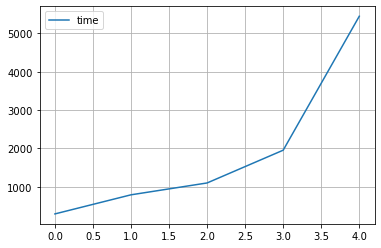

In [17]:
total_time = list()
total_time.append(x1)
total_time.append(x2)
total_time.append(x3)
total_time.append(x4)
total_time.append(x5)

import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame()
df['time'] = total_time

df.plot()
plt.grid()

4) In the plot we can see that the complexity follows a linear growth, for that reason we can say that the complexity of factorial will be O(n)

In [27]:
#5)
factorial_cache = {}
def factorial(n):
    """
    Implementation of factorial
    """
    if n == 0:
        return 1
    factorial_cache[n] = n * factorial(n-1)
    return (factorial_cache[n])

In [28]:
#6)
print ("Execution time for",num1,"in nanoseconds is:")
time1 = default_timer()*10**6
runtime1 = factorial(500)
time12 = default_timer()*10**6
x1 = time12 - time1
print (x1)

print ("Execution time for",num2,"in nanoseconds is:")
time2 = default_timer()*10**6
runtime2 = factorial(num2)
time21 = default_timer()*10**6
x2 = time21 - time2
print (x2)

print ("Execution time for",num3,"in nanoseconds is:")
time3 = default_timer()*10**6
runtime3 = factorial(num3)
time31 = default_timer()*10**6
x3 = time31 - time3
print (x3)

print ("Execution time for",num4,"in nanoseconds is:")
time4 = default_timer()*10**6
runtime4 = factorial(num4)
time41 = default_timer()*10**6
x4= time41 - time4
print (x4)

print ("Execution time for",num5,"in nanoseconds is:")
time5 = default_timer()*10**6
runtime5 = factorial(num5)
time51 = default_timer()*10**6
x5 = time51 - time5
print (x5)


Execution time for 500 in nanoseconds is:
727.5000000596046
Execution time for 1000 in nanoseconds is:
1077.5000000596046
Execution time for 1500 in nanoseconds is:
2458.399999976158
Execution time for 2000 in nanoseconds is:
3073.699999988079
Execution time for 2500 in nanoseconds is:
2948.100000023842


7) the complexity will be 0(logn) since the execution time tends to the same value

8) By using memorization we are going to store values, in order to avoid problems with duplicate calculations, the problem will be optimized and it will take less time to execute.


Therefore, when calculating the factorial of a number without memorization each call will be calculated step by step. While with memorization there will be a calculated part and this would be used, thus avoiding doing the whole calculation again